### Data Preprocessing

In [3]:
# Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the training set

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output

In [7]:
len(training_set)

1258

In [8]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping / Adding a new dimension

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # here '1' is the no.of indicators which is 'Open Price' over here

In [17]:
X_train.shape

(1198, 60, 1)

### Building the RNN

In [ ]:
# Importing the Keras libraries and packages

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialising the RNN

In [16]:
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

In [19]:
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))

In [21]:
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 50, return_sequences = True))

In [23]:
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50))

In [25]:
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer

In [26]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# for regression we use 'mean_squared_error' as the loss function

### Training the RNN Model by fitting the RNN to the training set

In [29]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0040
Epoch 2/100
38/38 [==============================] - 2s 49ms/step - loss: 0.0043
Epoch 3/100
38/38 [==============================] - 2s 50ms/step - loss: 0.0039
Epoch 4/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0039
Epoch 5/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0036
Epoch 6/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0039
Epoch 7/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0034
Epoch 8/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0034
Epoch 11/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0036
Epoch 12/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0035
Epoch 13/100
38/38 [=====

### Making the Predictions and visualising the results

In [ ]:
# Getting the real stock price of 2017

In [30]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicted stock price of 2017

In [32]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)  # To avoid the format problem in Numpy
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):   # Test set contains 20 stock prices so upper bound becomes 60+20 = 80
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # here '1' is the no.of indicators which is 'Open Price' over here
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # Inverse Scaling

In [ ]:
# Visualizing the results

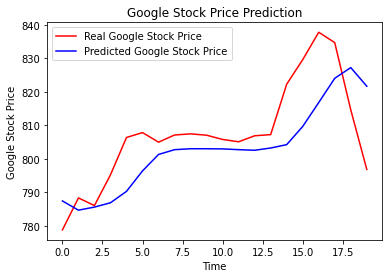

In [33]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()